In [1]:
map_file_name = 'empty-16-16.map'
scen_file_name = 'empty-16-16.scen'
answer_file_name = map_file_name + '.ans'

In [2]:
import os.path
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'


In [5]:
res_folder = Path().cwd().parents[0] / 'data' / 'empty-16-16'

In [6]:
import reader as reader

MAP = reader.read_map(res_folder / map_file_name)
SCEN = reader.read_scen(res_folder / scen_file_name)
RES = reader.read_res(res_folder / answer_file_name)
#M = reader.read_map("minimap.txt")
#S = reader.read_res("minires.txt")

In [7]:


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from animation import animate_list
from draw_filling import draw_filling
from show_map import show_map

In [9]:
res = []
for i in range(len(RES)):
    res.append(animate_list(list(map(draw_filling, show_map(MAP, SCEN, RES, i, withPath=True))), play=False))
animate_list(res, play=False)

10


interactive(children=(IntSlider(value=0, description='step', max=23), Output()), _dom_classes=('widget-interac…

14


interactive(children=(IntSlider(value=0, description='step', max=23), Output()), _dom_classes=('widget-interac…

24


interactive(children=(IntSlider(value=0, description='step', max=23), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='step', max=2), Output()), _dom_classes=('widget-interact…

<function animation.step_slice(lst, step)>

In [12]:
import reader as reader
import numpy as np

benchmark_folder = Path().cwd().parents[0] / 'data'

In [13]:

def show_success_rate(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    ax.set_ylabel('Success rate')
    ax.set_xlabel('Number of agents')
    plt.title('Success rate')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1], algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show()  
    

def show_finish_rate(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    ax.set_ylabel('Finish rate')
    ax.set_xlabel('Number of agents')
    plt.title('Finish rate')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1] / c, algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show() 


def show_runtime(t, c):
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    plt.title('Runtime')
    ax.set_ylabel('Average runtime (sec)')
    ax.set_xlabel('Number of agents')
    for i, algo in enumerate(t):
        agents = list(map(lambda x: x[0] * c, algo[1]))
        success_rate = list(map(lambda x: x[1], algo[1]))
        ax.plot(agents, success_rate, marker = 'o', label=algo[0])
    ax.legend()
    plt.show()
    d = {'N': np.arange(1, len(t[0][1]) + 1)}
    for (algo, res) in t:
        d.update({ algo : list(map(lambda x: round(x[1], 4), res))})
    dataframe = pd.DataFrame(d)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()

    ax.table(cellText = dataframe.values,
          rowLabels = dataframe.index,
          colLabels = dataframe.columns,
          loc = "center"
         )
    #ax.set_title("Runtime")
    ax.axis("off");
    

import pandas as pd
    
def show_answer(t, c):
    d = {'N': np.arange(1, len(t[0][1]) + 1)}
    for (algo, res) in t:
        d.update({ algo : list(map(lambda x: round(x[1], 2), res))})
    dataframe = pd.DataFrame(d)
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()

    ax.table(cellText = dataframe.values,
          rowLabels = dataframe.index,
          colLabels = dataframe.columns,
          loc = "center"
         )
    #ax.set_title("Runtime")
    ax.axis("off");
    
def get_results(t, names, c=None):
    res = []
    for name in names:
        cc = t[name]
        if (c != None):
            cc = list(filter(lambda x: x[0] <= c, cc))
        res.append((name, cc))
    return res

In [14]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-opt.map.ben", 2)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
CENTRALIZED(SLOW)
CENTRALIZED
1
CENTRALIZED(SLOW)
CENTRALIZED
2
CENTRALIZED(SLOW)
CENTRALIZED
3
CENTRALIZED(SLOW)
CENTRALIZED
4
CENTRALIZED(SLOW)
CENTRALIZED
5
CENTRALIZED(SLOW)
CENTRALIZED
6
CENTRALIZED(SLOW)
CENTRALIZED
7
CENTRALIZED(SLOW)
CENTRALIZED
8
CENTRALIZED(SLOW)
CENTRALIZED
9
CENTRALIZED(SLOW)
CENTRALIZED
10
CENTRALIZED(SLOW)
CENTRALIZED
11
CENTRALIZED(SLOW)
CENTRALIZED
12
CENTRALIZED(SLOW)
CENTRALIZED
13
CENTRALIZED(SLOW)
CENTRALIZED
14
CENTRALIZED(SLOW)
CENTRALIZED
15
CENTRALIZED(SLOW)
CENTRALIZED
16
CENTRALIZED(SLOW)
CENTRALIZED
17
CENTRALIZED(SLOW)
CENTRALIZED
18
CENTRALIZED(SLOW)
CENTRALIZED
19
CENTRALIZED(SLOW)
CENTRALIZED


In [15]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'empty-16-16' / "empty-16-16-strategy-full.map.ben", 5)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
1
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
2
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
3
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
4
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
5
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MOVEMENT)
6
FULL_DECENTRALIZED(AGENT)
FULL_DECENTRALIZED(POSITION)
FULL_DECENTRALIZED(SQUARE+)
FULL_DECENTRALIZED(POSITION+)
FULL_DECENTRALIZED(MO

In [21]:
success, ans, nodes, time, NLAUNCH = reader.read_benchmark(benchmark_folder  / 'house' / "house.map-new.ben", 5)
success = {k: list(map(lambda xx: (xx[0], xx[1] * 1.0 / NLAUNCH), v.items())) for k, v in success.items()}
time = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in time.items()}
ans = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in ans.items()}
nodes = {k: list(map(lambda xx: (xx[0], np.mean(xx[1])), v.items())) for k, v in nodes.items()}

0
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
1
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
2
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
3
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
4
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
5
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
6
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
7
CENTRALIZED
PARTIALLY-DECENTRALIZED
PARTIALLY-DECENTRALIZED+
PARTIALLY-DECENTRALIZED(NO_MAP)
FULL_DECENTRALIZED(SQUARE+)
8
CENTRALIZED
PA

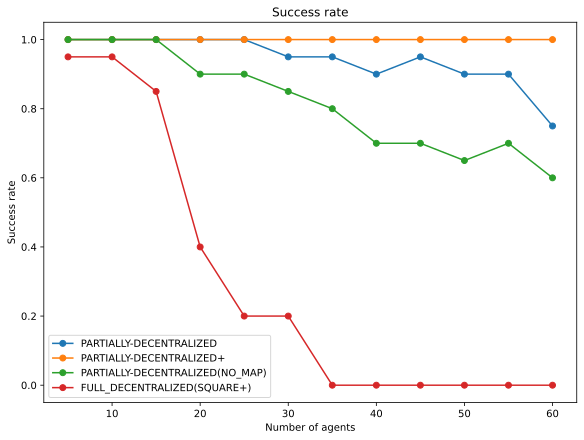

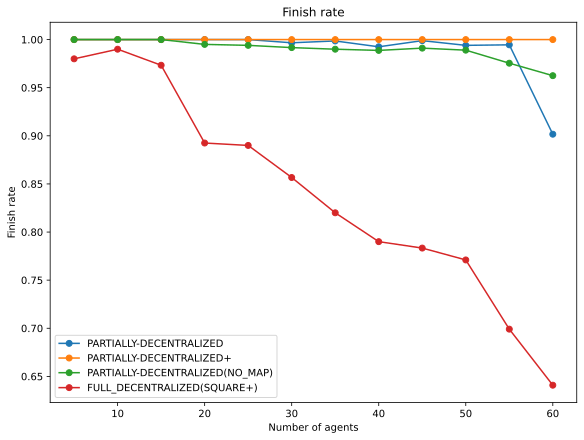

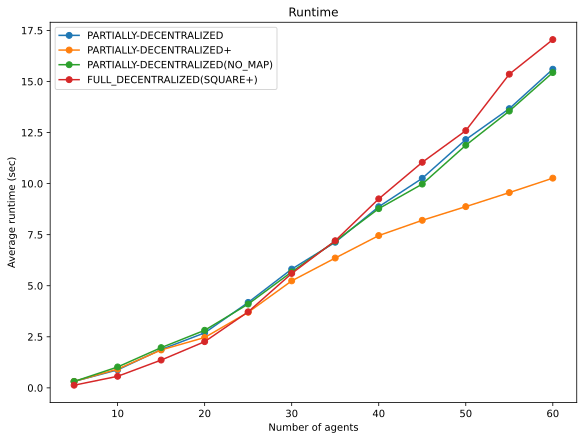

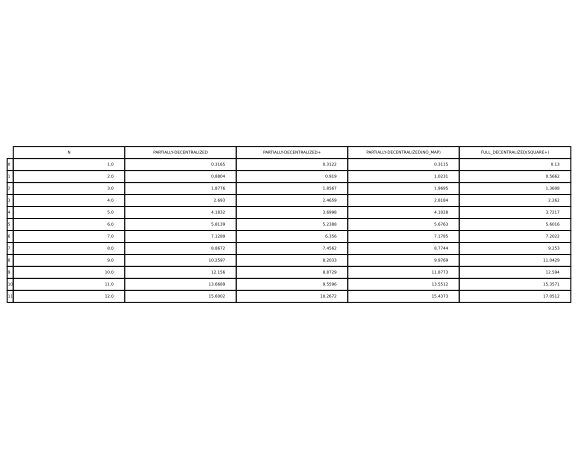

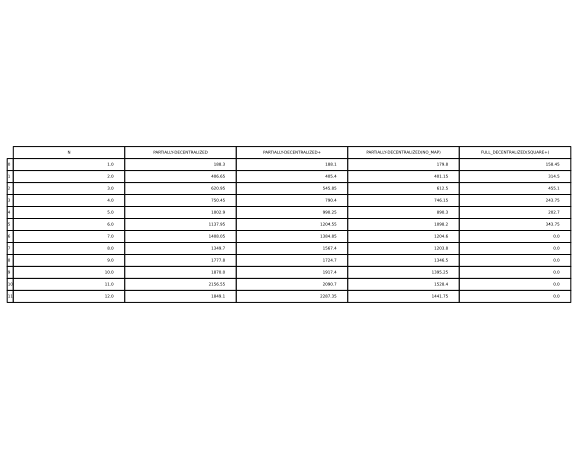

In [22]:
arr = [
    'PARTIALLY-DECENTRALIZED',
    'PARTIALLY-DECENTRALIZED+',
    'PARTIALLY-DECENTRALIZED(NO_MAP)',
    'FULL_DECENTRALIZED(SQUARE+)'
]

show_success_rate(get_results(success, arr), 1)

show_finish_rate(get_results(nodes, arr), 1)

show_runtime(get_results(time, arr), 1)

show_answer(get_results(ans, arr), 1)
